# Photo-z posteriors through normalizing flow

This notebook shows how to load a normalizing flow from pzflow, wrap it for rail.creation, and draw galaxy samples with redshift posteriors.

In [1]:
from pzflow.examples import example_flow
from rail.creation import Creator, engines
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches

Found classifier FZBoost
Found classifier randomPZ
Found classifier simpleNN
Found classifier trainZ


Let's load the example galaxy redshift flow from pzflow. To see the construction of this flow, look at this pzflow [example notebook](https://github.com/jfcrenshaw/pzflow/blob/main/examples/redshift_example.ipynb). This flow will be wrapped in a `FlowEngine`, which is a wrapper so that the methods of the flow match the methods expected by the `Creator` object

In [2]:
flow = engines.FlowEngine(example_flow())
creator = Creator(flow)

Now we can draw samples from the creator:

In [3]:
samples = creator.sample(n_samples=10000, seed=0)
samples

,redshift,u,g,r,i,z,y
0,0.393997,27.297070,26.608047,25.823528,25.637018,25.457422,25.402615
1,1.074528,28.773716,28.053043,27.054131,26.333954,25.542730,25.196632
2,0.868902,25.349680,24.758684,23.739189,22.760242,22.150572,21.922087
3,0.882291,29.293699,29.457298,27.156202,23.970657,22.441629,22.468880
4,0.645935,25.002502,24.503626,23.536652,22.864025,22.729633,22.599373
...,...,...,...,...,...,...,...
9995,0.564089,24.270777,23.695194,22.811609,22.379425,22.245783,22.074886
9996,0.957725,26.958488,26.591015,26.006458,25.352823,24.890572,24.733727
9997,0.483055,25.462103,24.639219,23.570709,23.176926,22.988663,22.746996
9998,0.252812,25.707973,25.055510,24.536942,24.356430,24.168427,24.152348


These samples don't include redshift posteriors. If we want posteriors, we need to set`include_pdf==True`:

In [4]:
samples_w_pdfs = creator.sample(n_samples=10000, seed=0, include_pdf=True)
samples_w_pdfs

,redshift,u,g,r,i,z,y,pz_pdf
0,0.393997,27.297070,26.608047,25.823528,25.637018,25.457422,25.402615,"[0.0, 9.732233e-13, 1.1670975e-12, 1.7313615e-..."
1,1.074528,28.773716,28.053043,27.054131,26.333954,25.542730,25.196632,"[0.0, 1.1814372e-10, 1.0702446e-10, 1.216455e-..."
2,0.868902,25.349680,24.758684,23.739189,22.760242,22.150572,21.922087,"[0.0, 1.0927656e-10, 1.479296e-10, 2.098381e-1..."
3,0.882291,29.293699,29.457298,27.156202,23.970657,22.441629,22.468880,"[0.0, 1.9933475e-11, 1.3926907e-11, 1.1781193e..."
4,0.645935,25.002502,24.503626,23.536652,22.864025,22.729633,22.599373,"[0.0, 5.8981655e-13, 1.2115553e-12, 2.9817693e..."
...,...,...,...,...,...,...,...,...
9995,0.564089,24.270777,23.695194,22.811609,22.379425,22.245783,22.074886,"[0.0, 8.487589e-09, 1.5761543e-08, 1.9842691e-..."
9996,0.957725,26.958488,26.591015,26.006458,25.352823,24.890572,24.733727,"[0.0, 7.207841e-12, 1.8250337e-11, 2.1433681e-..."
9997,0.483055,25.462103,24.639219,23.570709,23.176926,22.988663,22.746996,"[0.0, 7.277773e-09, 5.8763163e-09, 8.762193e-0..."
9998,0.252812,25.707973,25.055510,24.536942,24.356430,24.168427,24.152348,"[0.0, 3.3504262e-09, 5.6500578e-09, 8.890535e-..."


The last column of the samples are the true redshift posteriors. You can also access the grid over which the posteriors were calculated:

In [5]:
samples_w_pdfs.attrs['pz_grid']

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
       1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74,
       1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96,
       1.98, 2.  ])

This is the default redshift grid, but we can also define our own grid:

In [6]:
grid = np.arange(0, 2.5, 0.5)
samples_w_pdfs2 = creator.sample(n_samples=10000, seed=0, include_pdf=True, pz_grid=grid)
samples_w_pdfs2

,redshift,u,g,r,i,z,y,pz_pdf
0,0.393997,27.297070,26.608047,25.823528,25.637018,25.457422,25.402615,"[0.0, 1.9998642, 2.1285383e-07, 1.7229162e-05,..."
1,1.074528,28.773716,28.053043,27.054131,26.333954,25.542730,25.196632,"[0.0, 0.00076800096, 1.9990207, 0.0002113544, ..."
2,0.868902,25.349680,24.758684,23.739189,22.760242,22.150572,21.922087,"[0.0, 0.01740675, 1.9825932, 4.310025e-11, 6.1..."
3,0.882291,29.293699,29.457298,27.156202,23.970657,22.441629,22.468880,"[0.0, 0.052184384, 1.4304796, 0.5173339, 3.750..."
4,0.645935,25.002502,24.503626,23.536652,22.864025,22.729633,22.599373,"[0.0, 1.9948087, 0.0011741763, 0.004017025, 3...."
...,...,...,...,...,...,...,...,...
9995,0.564089,24.270777,23.695194,22.811609,22.379425,22.245783,22.074886,"[0.0, 2.0, 8.569519e-10, 4.803747e-10, 2.32555..."
9996,0.957725,26.958488,26.591015,26.006458,25.352823,24.890572,24.733727,"[0.0, 1.2922388e-06, 1.9999745, 1.6090831e-05,..."
9997,0.483055,25.462103,24.639219,23.570709,23.176926,22.988663,22.746996,"[0.0, 2.0, 1.2653179e-17, 6.143358e-16, 5.4275..."
9998,0.252812,25.707973,25.055510,24.536942,24.356430,24.168427,24.152348,"[0.0, 1.9988248, 1.4300424e-06, 0.00021263136,..."


In [7]:
samples_w_pdfs2.attrs['pz_grid']

array([0. , 0.5, 1. , 1.5, 2. ])

Let's plot a few of the pdf's

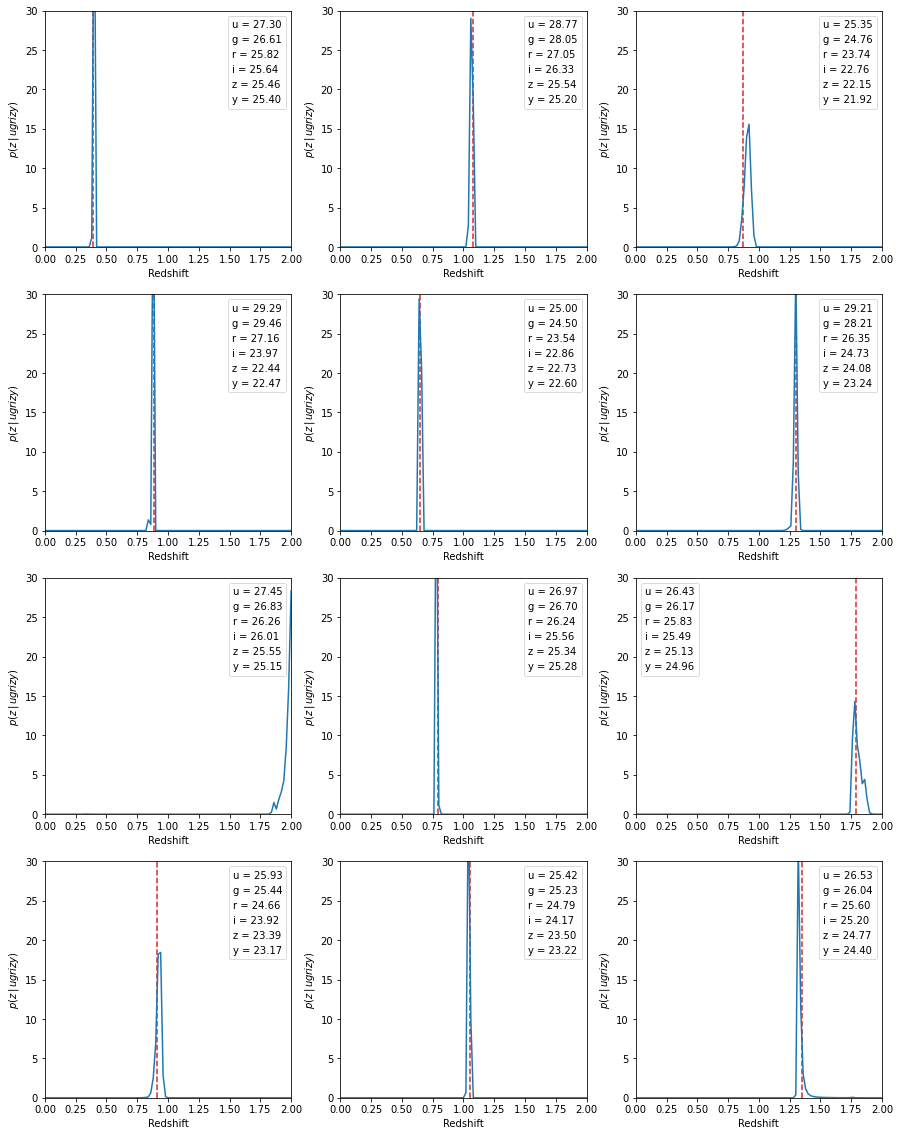

In [8]:
fig,axes = plt.subplots(4, 3, figsize=(15,20))

axes = axes.flatten()

for idx, ax in enumerate(axes):
    
    zs = samples_w_pdfs.attrs['pz_grid']
    redshift, u, g, r, i, z, y, pz = samples_w_pdfs.loc[idx]
    ax.plot(zs, pz)
    
    ax.axvline(redshift, c='C3', ls='--', zorder=0)
    
    # create legend with magnitudes
    handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", lw=0, alpha=0)] * 6
    labels = []
    band_labels = ['u', 'g', 'r', 'i', 'z', 'y']
    for band,mag in zip(band_labels, [u,g,r,i,z,y]):
        labels.append(f'{band} = {mag:.2f}')
    ax.legend(handles, labels, loc='best', 
              fancybox=True, framealpha=0.7, 
              handlelength=0, handletextpad=0)
    
    ax.set_xlim(0,2)
    ax.set_ylim(0,30)
    ax.set_xlabel("Redshift")
    ax.set_ylabel("$p(z \,|\, ugrizy)$")

Let's look at the point estimates

In [9]:
z_map = []
for pz in samples_w_pdfs['pz_pdf']:
    z_map.append(samples_w_pdfs.attrs['pz_grid'][pz.argmax()])

(0.0, 2.0)

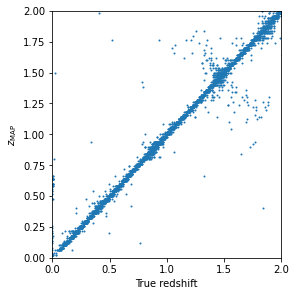

In [10]:
fig,ax = plt.subplots(figsize=(4,4), constrained_layout=True)
ax.scatter(samples_w_pdfs['redshift'], z_map, s=1)
ax.set_xlabel('True redshift')
ax.set_ylabel('$z_\mathrm{MAP}$')
ax.set_xlim(0,2)
ax.set_ylim(0,2)